## EJERCICIO 2 - PRACTICA 5

In [4]:
# Importo MNIST
from tensorflow.keras.datasets import mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


# Importar Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense


# import matplotlib
import matplotlib.pyplot as plt



### Importo digitos escritos a manos 

In [23]:
# Importo MNIST
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# import matplotlib
import matplotlib.pyplot as plt


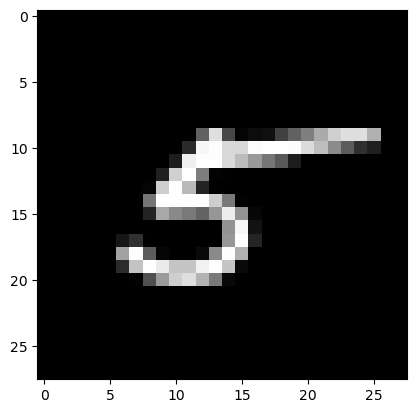

In [24]:
nImg = 947 # nro. de imagen a visualizar
plt.imshow(X_train[nImg, :,:], cmap='gray')

### Se buscará resolver la clasificación de los dígitos de MNIST usando la siguiente configuración:

In [16]:
#Constantes
#F es la cantidad de filtros o de mapas de características
F=4
#K es el tamaño del kernel o máscara:
K=3
#S es el valor del stride:
S=1
#FUN es la función de activación de la capa de convolución:
FUN='relu'

#Modelo
model = Sequential() 
model.add(Input(shape=(28, 28, 1))) 
model.add(Conv2D(F, kernel_size=K, strides=(S,S), activation=FUN)) 
model.add(MaxPooling2D(pool_size=(2,2))) # -- opcional --
model.add(Flatten())
model.add(Dense(10,activation='softmax')) 
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 4)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 676)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                6770      
                                                                 
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________


### Parada temprana

In [17]:
from tensorflow.keras.callbacks import EarlyStopping 
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

#Si el valor del accuracy sobre los datos de validación no mejora después de 5 épocas, el entrenamiento finaliza.

### Entrenamiento

In [21]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [22]:
LOTES=64 #entiendo q este valor puede ir cambiando
#El tamaño del lote indica cuántas muestras serán procesadas antes de que el modelo actualice los pesos.

H = model.fit(x = X_train, y = Y_train, batch_size = LOTES, 
validation_data = (X_test, Y_test), epochs=4000, callbacks=[es]) 


Epoch 1/4000


ValueError: in user code:

    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\engine\training.py", line 1083, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\losses.py", line 2005, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis
    File "C:\Users\W10\anaconda3\envs\p37env\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


### Tabla de resultados

In [8]:
import pandas as pd
import numpy as np

# Crear el DataFrame con los datos de la tabla
data = {
    'Cant. de filtros': [8, 16, 32, 16, 64, 64],
    'Tamaño del kernel': ['3x3', '5x5', '7x7', '3x3', '7x7', '3x3'],
    'Convolución con Stride': [1, 1, 1, 1, 1, 2],
    'Función de activación': ['ReLU', 'ReLU', 'ReLU', 'ReLU', 'ReLU', 'Tanh'],
    'Max Pooling con tamaño 2x2': ['Sí', 'Sí', 'Sí', 'Sí', 'Sí', 'No'],
    'Parámetros entrenables': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Épocas en Train': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Accuracy en Train': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Accuracy en Test': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)


   Cant. de filtros Tamaño del kernel  Convolución con Stride  \
0                 8               3x3                       1   
1                16               5x5                       1   
2                32               7x7                       1   
3                16               3x3                       1   
4                64               7x7                       1   
5                64               3x3                       2   

  Función de activación Max Pooling con tamaño 2x2  Parámetros entrenables  \
0                  ReLU                         Sí                     0.0   
1                  ReLU                         Sí                     0.0   
2                  ReLU                         Sí                     0.0   
3                  ReLU                         Sí                     0.0   
4                  ReLU                         Sí                     0.0   
5                  Tanh                         No                     0.0  